### Data Exploration Class
 #### Goals of Data Exploration
     - Understand the signals in data, their strength, features that drive the outcome, and other features to construct through questions and hypothesis
     - In general, we explore our target variables against the independent, or predictor, variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
from pandas_profiling import ProfileReport

In [2]:
train, test, validate = prepare.prep_titanic()

train, test, validate = prepare.impute(train, test, validate, my_strategy = 'mean', column_list = 'age')
train

,survived,sex,age,sibsp,parch,fare,embarked,class,alone
769,0,male,32.000000,0,0,8.3625,S,Third,1
607,1,male,27.000000,0,0,30.5000,S,First,1
661,0,male,40.000000,0,0,7.2250,C,Third,1
204,1,male,18.000000,0,0,8.0500,S,Third,1
205,0,female,2.000000,0,1,10.4625,S,Third,0
...,...,...,...,...,...,...,...,...,...
773,0,male,29.794372,0,0,7.2250,C,Third,1
118,0,male,24.000000,0,1,247.5208,C,First,0
550,1,male,17.000000,0,2,110.8833,C,First,0
323,1,female,22.000000,1,1,29.0000,S,Second,0


In [53]:
pd.crosstab(train.survived, train.sex, margins = True, normalize = True)

sex,female,male,All
survived,,,
0,0.088028,0.52993,0.617958
1,0.257042,0.12500,0.382042
All,0.345070,0.65493,1.000000


In [51]:
pd.crosstab(train.survived, train['class'], normalize = True)

class,First,Second,Third
survived,,,
0,0.095070,0.107394,0.415493
1,0.147887,0.091549,0.142606


In [52]:
pd.crosstab(train.survived, train.embarked, normalize = True)

embarked,C,Q,S
survived,,,
0,0.096831,0.045775,0.475352
1,0.103873,0.038732,0.239437


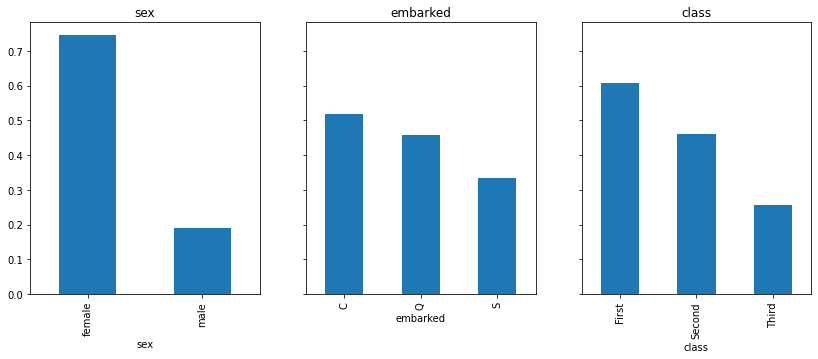

In [4]:
survival_rate = train.survived.mean()
features = ['sex', 'embarked', 'class']
fig, axs = plt.subplots(1,3, figsize = (14,5), sharey = True)
for i, feature in enumerate(features):
    #print(i, feature)
    train.groupby(feature).survived.mean().plot.bar(ax= axs[i])
    axs[i].set(title = feature)
    

In [5]:
survival_rate

0.38204225352112675

In [6]:
pd.crosstab(train.survived, train.sex, margins = True, normalize = True)

sex,female,male,All
survived,,,
0,0.088028,0.52993,0.617958
1,0.257042,0.12500,0.382042
All,0.345070,0.65493,1.000000


In [7]:
pd.crosstab(train.embarked, train.survived, margins = True, normalize = True)

survived,0,1,All
embarked,,,
C,0.096831,0.103873,0.200704
Q,0.045775,0.038732,0.084507
S,0.475352,0.239437,0.714789
All,0.617958,0.382042,1.000000


<AxesSubplot:xlabel='survived', ylabel='class'>

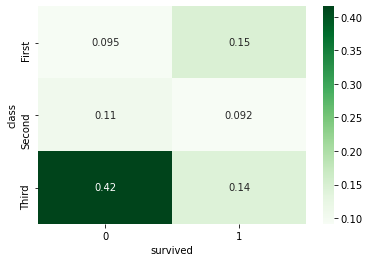

In [8]:
ctab = pd.crosstab(train['class'], train.survived, normalize = True)
sns.heatmap(ctab, cmap = 'Greens', annot = True)

#### in above heat map, the percentage are of the overall people that represent each class and if they survived or not
 - so, 0.42 from third class at 0 : 42% of the people who did not survive were in the third class

#### Comparing three categorical variable

In [54]:
train.pivot_table('survived', 'sex', 'class')

class,First,Second,Third
sex,,,
female,0.982456,0.911111,0.521277
male,0.345679,0.161765,0.143498


#### df.pivot_table aggregates whereas df.pivot does not aggregate

In [9]:
train.pivot_table('survived', 'sex', 'class')

class,First,Second,Third
sex,,,
female,0.982456,0.911111,0.521277
male,0.345679,0.161765,0.143498


In [10]:
train.pivot_table('survived', 'sex', 'class')

class,First,Second,Third
sex,,,
female,0.982456,0.911111,0.521277
male,0.345679,0.161765,0.143498


<AxesSubplot:xlabel='class', ylabel='sex'>

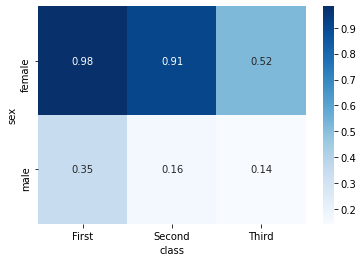

In [11]:
sns.heatmap(train.pivot_table('survived', 'sex', 'class'), cmap = "Blues", annot = True)

 - 98 % of the female passengers in first class survived
 - 91% of the female in second class survived
 - 52% of the female in thrid class survived


#### Exploring the target variables against continuous variable

In [12]:
train.groupby('survived').age.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,351.0,30.320229,12.583721,1.00,23.0,29.794372,35.0,71.0
1,217.0,28.943793,13.829790,0.42,22.0,29.794372,35.0,80.0


<AxesSubplot:ylabel='Frequency'>

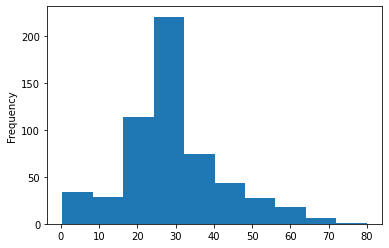

In [13]:
train.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

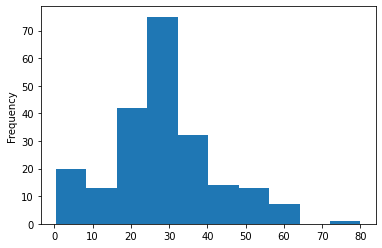

In [14]:
train[train.survived == 1].age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

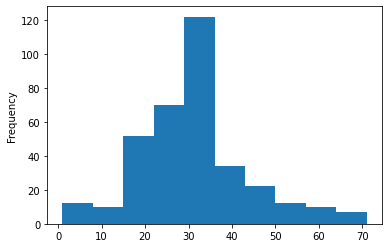

In [15]:
train[train.survived == 0].age.plot.hist()

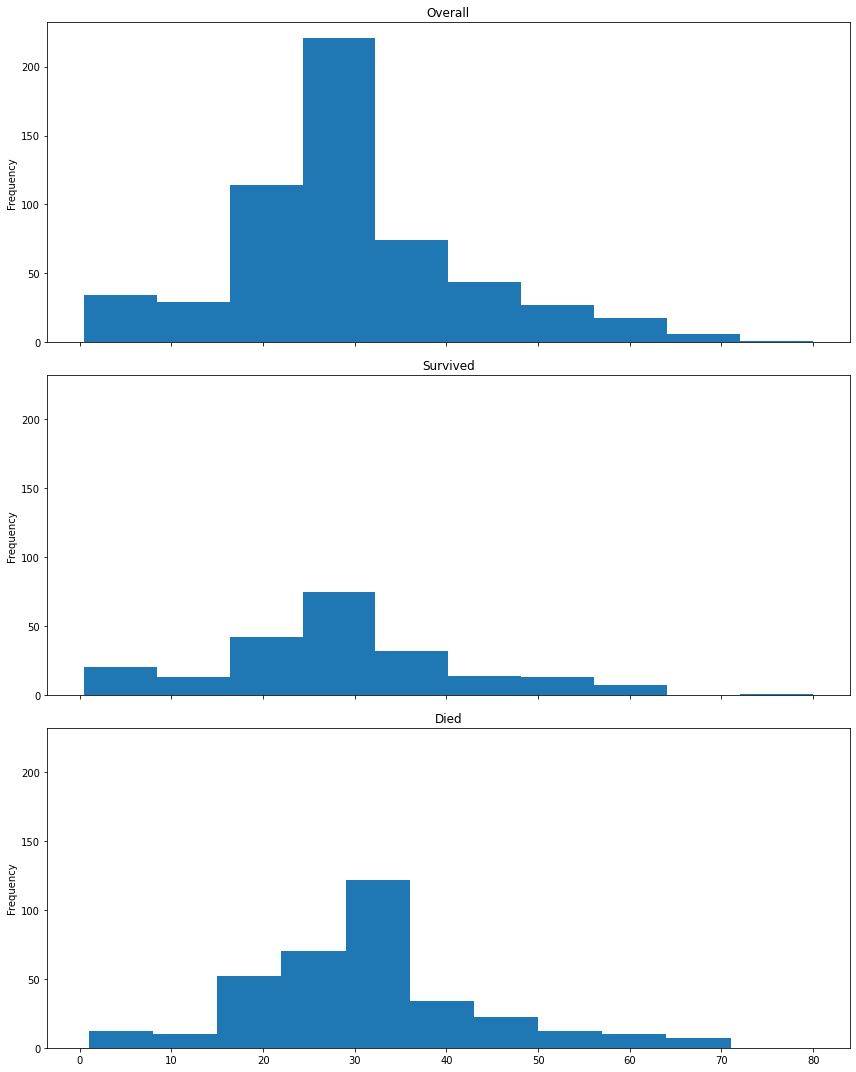

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, sharey=True)

train.age.plot.hist(ax=axs[0], title='Overall')
train[train.survived == 1].age.plot.hist(ax=axs[1], title='Survived')
train[train.survived == 0].age.plot.hist(ax=axs[2], title='Died')
fig.tight_layout()

<AxesSubplot:xlabel='survived', ylabel='fare'>

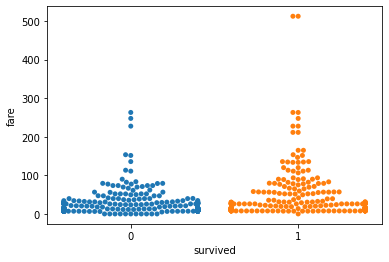

In [22]:
sns.swarmplot(data = train, y = 'fare', x = 'survived')

we can compare 1 cont and 2 categorical variables with swarmplot
 - class
 - survived
 - fare

<AxesSubplot:xlabel='class', ylabel='fare'>

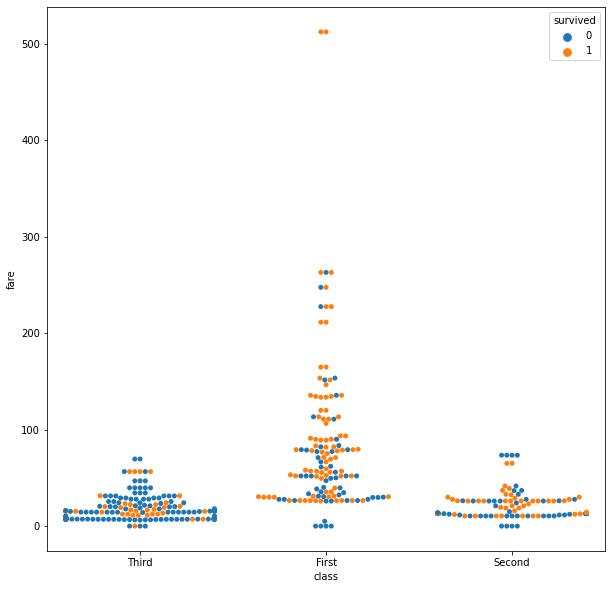

In [23]:
plt.figure(figsize= (10,10))

sns.swarmplot(data = train, x = 'class', y = 'fare', hue = 'survived')

<AxesSubplot:xlabel='class', ylabel='fare'>

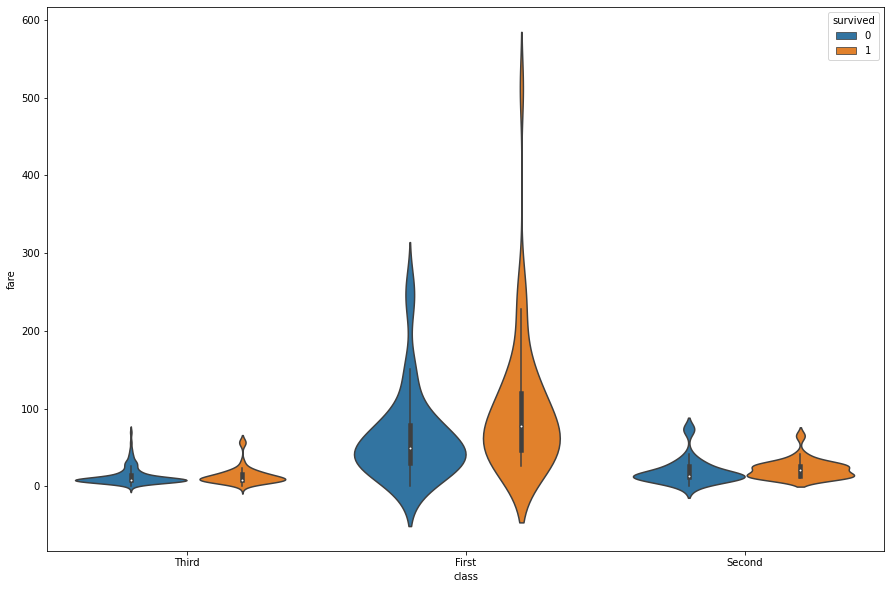

In [24]:
plt.figure(figsize= (15,10))
sns.violinplot(data = train, x = 'class', y = 'fare', hue = 'survived')

In [25]:
train.groupby('embarked').fare.var()

embarked
C    6747.146226
Q     296.597448
S    1341.282075
Name: fare, dtype: float64

<AxesSubplot:xlabel='embarked', ylabel='fare'>

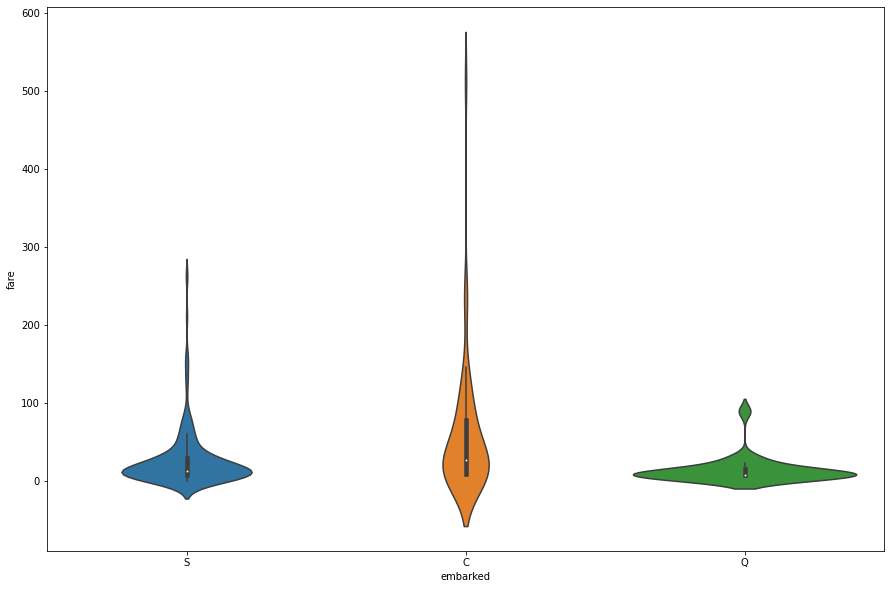

In [26]:
plt.figure(figsize= (15,10))
sns.violinplot(data = train, x = 'embarked', y = 'fare')

<AxesSubplot:xlabel='embarked', ylabel='fare'>

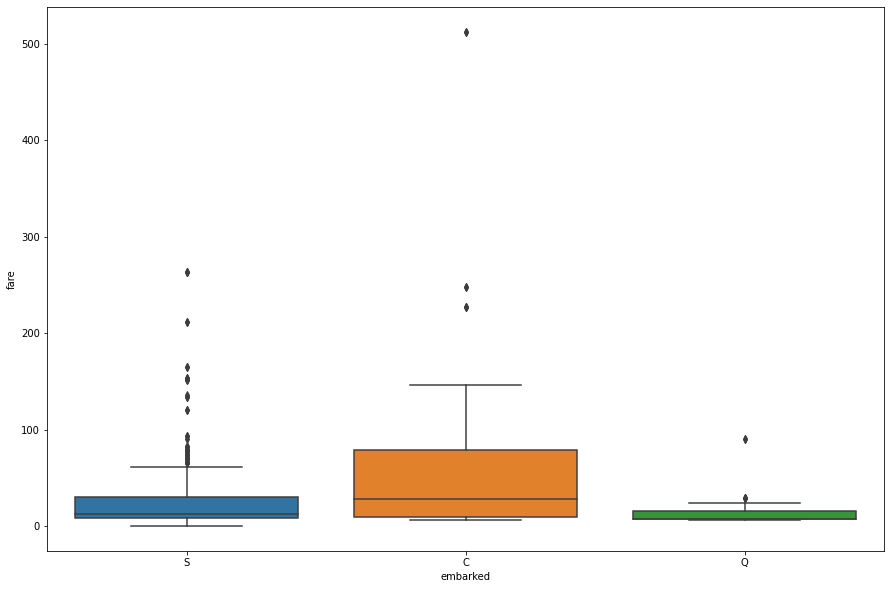

In [27]:
plt.figure(figsize= (15,10))
sns.boxplot(data = train, x = 'embarked', y = 'fare')

In [33]:
pd.crosstab(train['class'], train.embarked, margins = True)
# checking if the embark town influences the class of tickets bought
# whihc eventually influenced the survival rate

embarked,C,Q,S,All
class,,,,
First,53,2,83,138
Second,11,2,100,113
Third,50,44,223,317
All,114,48,406,568


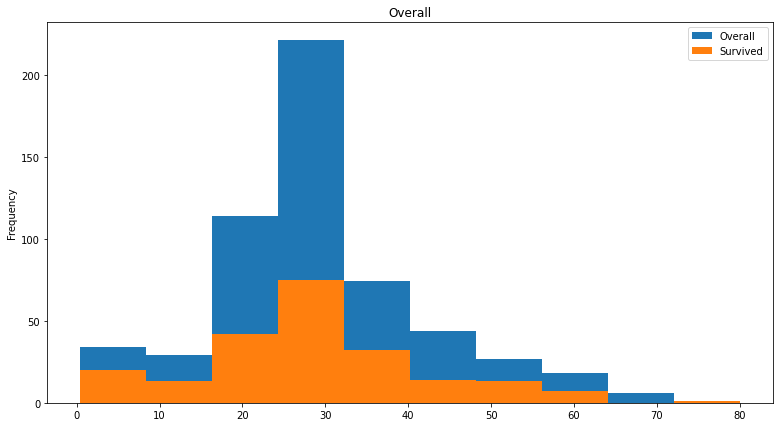

In [37]:
ax = train.age.plot.hist(title='Overall', figsize=(13, 7), label='Overall')
train[train.survived == 1].age.plot.hist(ax=ax, label='Survived')
plt.legend()

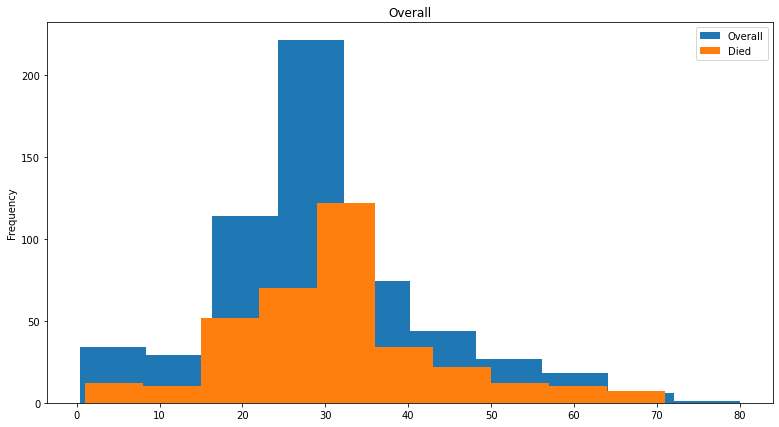

In [39]:
ax = train.age.plot.hist(title='Overall', figsize=(13, 7), label='Overall')
train[train.survived == 0].age.plot.hist(ax=ax, label='Died')
plt.legend()

### use of fig, axs. This is purely for learning purpose only!!

<AxesSubplot:title={'center':'bok'}, ylabel='Frequency'>

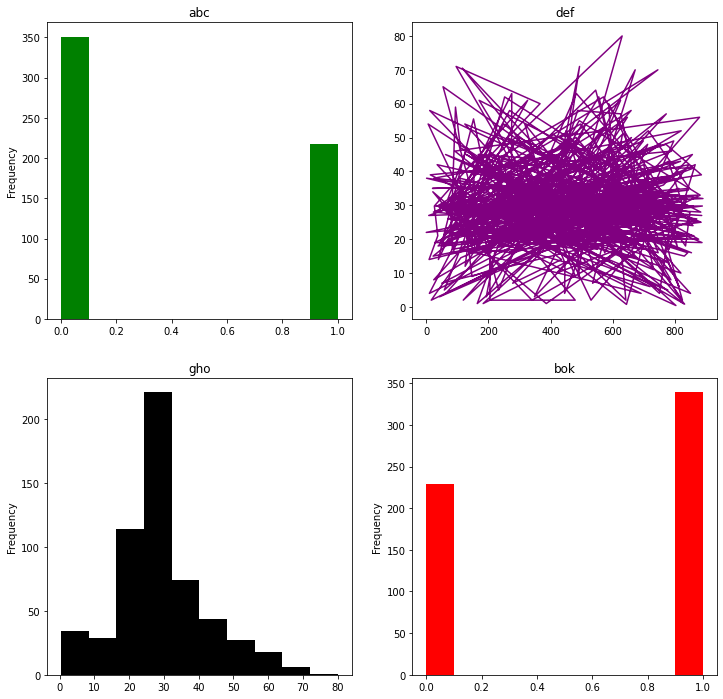

In [101]:
fig, axs = plt.subplots(2,2, figsize = (12,12))
train.survived.plot.hist(ax = axs[0,0], color = 'green', title = 'abc')
train.age.plot(ax = axs[0,1], color = 'purple', title = 'def')
train.age.plot.hist(ax = axs[1,0], color = 'black', title = 'gho')
train.alone.plot.hist(ax = axs[1,1], color = 'red', title = 'bok')

#### so basically:
- fig, axs = plt.subplots(#of rows, #of columns, figsize= (), sharey = True or False, sharex = True or False) will create charts within a single figure, the number of charts depends upon the value you provide of rows and columns,

- if you have more charts, make sure to have a high number for figsize


- after, 
    - you can fill these plots using 
    - plot.hist(..., ax = axs[])
    - plot()
    - plot.scatter()

- but make sure to assign your ax for each plot to axs[0,0] for 1st first, 1st column, [0,1] for first row 2nd column, [1,0] for  2nd row, 1st column, so on and on